# Introduction:

## First code implemented to get the transport hubs

In [24]:
import pandas as pd
import numpy as np
import random as rd
import datetime
import matplotlib.pyplot as plt
links_paths_path = 'wikispeedia_paths-and-graph/'
plaintext_articles_path = './plaintext_articles/'
#wpcd_path = './wpcd/'

In [25]:
#read the paths_finished.tsv
paths_finished_df = pd.read_csv(links_paths_path + 'paths_finished.tsv', sep='\t', \
                                names = ['hashedIpAddress','timestamp', 'durationInSec', 'path', 'rating'], \
                                skiprows=15)
paths_finished_df['year'] = paths_finished_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).year)
paths_finished_df['path'] = paths_finished_df['path'].apply(lambda x: x.split(";"))

#see whether there are null elements in the dataset
paths_finished_df.isnull().sum()

hashedIpAddress        3
timestamp              0
durationInSec          0
path                   0
rating             22817
year                   0
dtype: int64

In [26]:
#drop the rows which have null elements in column 'hashedIpAddress'
paths_finished_df[~paths_finished_df['hashedIpAddress'].isnull()]

,hashedIpAddress,timestamp,durationInSec,path,rating,year
0,6a3701d319fc3754,1297740409,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN,2011
1,3824310e536af032,1344753412,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0,2012
2,415612e93584d30e,1349298640,138,"[14th_century, Niger, Nigeria, British_Empire,...",NaN,2012
3,64dd5cd342e3780c,1265613925,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",NaN,2010
4,015245d773376aab,1366730828,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3.0,2013
...,...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,"[Yagan, Ancient_Egypt, Civilization]",NaN,2012
51314,2ef7ac844cefda58,1300254138,165,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent...",3.0,2011
51315,12863abb7887f890,1385095372,228,"[Yagan, Australia, England, France, United_Sta...",NaN,2013
51316,19f8284371753362,1298792567,56,"[Yarralumla%2C_Australian_Capital_Territory, A...",1.0,2011


In [27]:
paths_finished_df.year.unique()

array([2011, 2012, 2010, 2013, 2009, 2008, 2014], dtype=int64)

The finished dataset contains data from 2008-2014 and the unfinished dataset only contains data from 2011-2014. We need to drop the dirty data from 2008-2010. In the meantime we need to handle the missing values.

In [28]:
#Only data from 2011-2014 are retained
query_year = [2011,2012,2013,2014]
paths_finished_df = paths_finished_df[paths_finished_df['year'].isin(query_year)] 

In [29]:
#read the paths_unfinished.tsv
paths_unfinished_df = pd.read_csv(links_paths_path + 'paths_unfinished.tsv', sep='\t',\
                                  names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target','type'], \
                                  skiprows=17)
paths_unfinished_df['year'] = paths_unfinished_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).year)
paths_unfinished_df['path'] = paths_unfinished_df['path'].apply(lambda x: x.split(";"))

#see whether there are null elements in the dataset
paths_finished_df.isnull().sum()

hashedIpAddress        0
timestamp              0
durationInSec          0
path                   0
rating             13104
year                   0
dtype: int64

In [30]:
#Only data from 2011-2014 are retained
query_year = [2011,2012,2013,2014]
paths_unfinished_df = paths_unfinished_df[paths_unfinished_df['year'].isin(query_year)] 

In [31]:
paths_df = pd.concat([paths_finished_df,paths_unfinished_df])
paths_df

,hashedIpAddress,timestamp,durationInSec,path,rating,year,target,type
0,6a3701d319fc3754,1297740409,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN,2011,NaN,NaN
1,3824310e536af032,1344753412,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0,2012,NaN,NaN
2,415612e93584d30e,1349298640,138,"[14th_century, Niger, Nigeria, British_Empire,...",NaN,2012,NaN,NaN
4,015245d773376aab,1366730828,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3.0,2013,NaN,NaN
5,5295bca242be81fe,1372890414,110,"[14th_century, Europe, North_America, United_S...",NaN,2013,NaN,NaN
...,...,...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,"[Franz_Kafka, Tuberculosis, World_Health_Organ...",NaN,2014,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,[Modern_history],NaN,2014,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,"[Computer_programming, Linguistics, Culture, P...",NaN,2014,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,"[Jamaica, United_Kingdom, World_War_II, Battle...",NaN,2014,Alan_Turing,timeout


In [32]:
paths_df.groupby('year').agg('count')

,hashedIpAddress,timestamp,durationInSec,path,rating,target,type
year,,,,,,,
2011,13737,13737,13737,13737,3300,6878,6878
2012,17790,17790,17790,17790,3716,8895,8895
2013,16519,16519,16519,16519,3566,8773,8773
2014,650,650,650,650,135,329,329


In [33]:
#split the strings in the column 'path' and transform them into lists
path_list_2011 = paths_df['path'][paths_df['year'] == 2011]
path_list_2012 = paths_df['path'][paths_df['year'] == 2012]
path_list_2013 = paths_df['path'][paths_df['year'] == 2013]
# path_list_2014 = paths_finished_df['path'][paths_finished_df['year'] == 2014].apply(lambda x: x.split(";"))

In [34]:
import os
font_folder_path = 'C:/Users/lyh/AppData/Local/Microsoft/Windows/Fonts/'
os.path.exists('C:/Users/lyh/AppData/Local/Microsoft/Windows/Fonts')

True

<class 'wordcloud.wordcloud.WordCloud'>


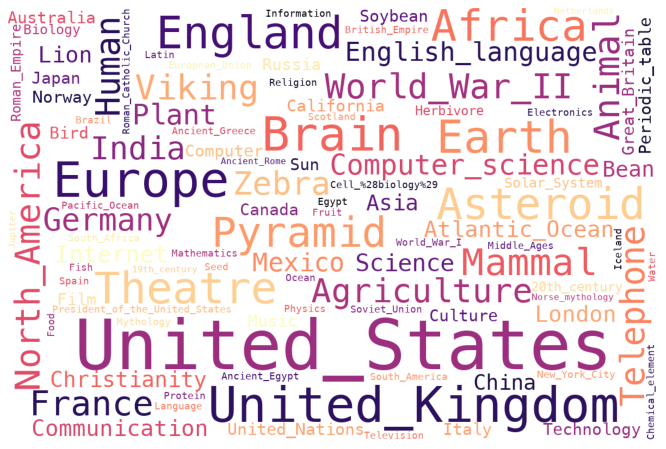

In [40]:
from collections import Counter
import wordcloud

def word_cnt(wlist):
    '''
    Count the number of occurrences of each term in all paths
    '''
    word_counts = Counter()
    
    for line in wlist:
        word_counts.update(line)
    
    return sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

def pic_words(list_):
    '''
    Draw the wordcloud plot to have a visual representation of how often they appear
    '''
    words_dict = {}
    for idx,item in enumerate(list_):
        words_dict[item[0]] = item[1]
    
    cloudobj = wordcloud.WordCloud(
        #font_path=font_folder_path + 'menlo.ttc',
        font_path=font_folder_path + 'Menlo-Regular.ttf',
        height = 800, width = 1200, mode = "RGBA", background_color = 'white', colormap='magma'
                                  ).fit_words(words_dict)
    print(type(cloudobj))
    plt.rcParams['figure.figsize'] = (12.0, 8.0)    
    plt.imshow(cloudobj)
    plt.axis("off")
    plt.show()
    return cloudobj
#Eliminate the most high frequent word "<", take [1:51]   
counter_list_2011 = word_cnt(path_list_2011)
TOP100_2011 = counter_list_2011[1:101]

cloud_2011 = pic_words(TOP100_2011)
print(cloud_2011)
TOP100_2011
cloud_2011.to_file('cloud_2011.png')

<class 'wordcloud.wordcloud.WordCloud'>


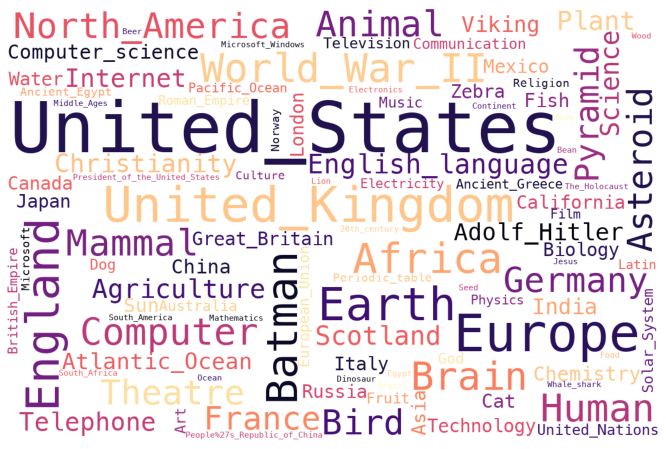

In [42]:
counter_list_2012 = word_cnt(path_list_2012)
TOP100_2012 = counter_list_2012[1:101]
cloud_2012 = pic_words(TOP100_2012)
print(cloud_2012)
TOP100_2012
cloud_2012.to_file('cloud_2012.png')

<class 'wordcloud.wordcloud.WordCloud'>


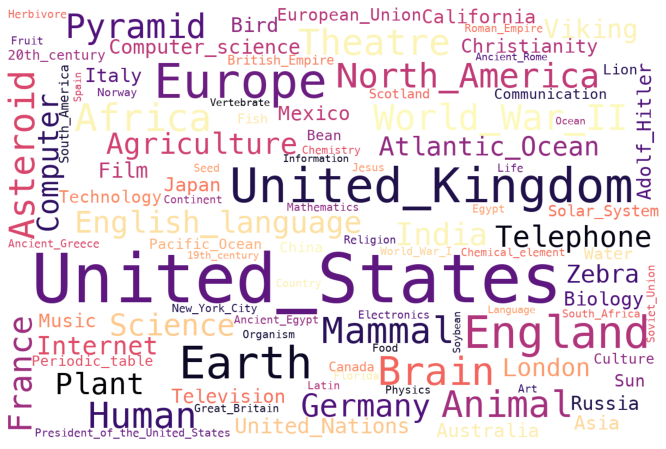

In [43]:
counter_list_2013 = word_cnt(path_list_2013)
TOP100_2013 = counter_list_2013[1:101]
cloud_2013 = pic_words(TOP100_2013)
print(cloud_2013)
TOP100_2013
cloud_2013.to_file('cloud_2013.png')

The most popular articles can be divided into several broad categories, such as country, subject, etc.

In [44]:
list_2011 = []
list_2012 = []
list_2013 = []

for idx,item in enumerate(TOP100_2011):
    list_2011.append(item[0])
    
for idx,item in enumerate(TOP100_2012):
    list_2012.append(item[0])
    
for idx,item in enumerate(TOP100_2013):
    list_2013.append(item[0])
    
#Calculation of words appearing in the TOP100 for all three years
print(len(list(set(list_2011).intersection(set(list_2012)).intersection(list_2013))))

79


We can see in 3 years' top 100 words, there are 79 common ones.